# Scraping the data from wikipedia using BeautifulSoup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup

Wikipedia URL

In [2]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html=urlopen(url)

In [3]:
soup=BeautifulSoup(html,"lxml")
type(soup)

bs4.BeautifulSoup

In [4]:
title=soup.title
print(title)

<title>List of postal codes of Canada: M - Wikipedia</title>


In [5]:
rows=soup.find_all("tr")


In [6]:
for row in rows:
    row_td = row.find_all('td')


In [7]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)

# Loading the Scraped data into a DataFrame

In [8]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[M1A, Not assigned, Not assigned\n]"
2,"[M2A, Not assigned, Not assigned\n]"
3,"[M3A, North York, Parkwoods\n]"
4,"[M4A, North York, Victoria Village\n]"
5,"[M5A, Downtown Toronto, Harbourfront\n]"
6,"[M5A, Downtown Toronto, Regent Park\n]"
7,"[M6A, North York, Lawrence Heights\n]"
8,"[M6A, North York, Lawrence Manor\n]"
9,"[M7A, Queen's Park, Not assigned\n]"


# Data Cleaning

In [9]:
df=df[0].str.split(",",expand=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,[M1A,Not assigned,Not assigned\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,[M2A,Not assigned,Not assigned\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,[M3A,North York,Parkwoods\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[M4A,North York,Victoria Village\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,[M5A,Downtown Toronto,Harbourfront\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,[M5A,Downtown Toronto,Regent Park\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,[M6A,North York,Lawrence Heights\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,[M6A,North York,Lawrence Manor\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,[M7A,Queen's Park,Not assigned\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [10]:
df=df[[0 ,1 ,2]]

In [11]:
df.head()

,0,1,2
0,[],None,None
1,[M1A,Not assigned,Not assigned\n]
2,[M2A,Not assigned,Not assigned\n]
3,[M3A,North York,Parkwoods\n]
4,[M4A,North York,Victoria Village\n]


In [12]:
df=df.iloc[1:-5,:]
df.head()

,0,1,2
1,[M1A,Not assigned,Not assigned\n]
2,[M2A,Not assigned,Not assigned\n]
3,[M3A,North York,Parkwoods\n]
4,[M4A,North York,Victoria Village\n]
5,[M5A,Downtown Toronto,Harbourfront\n]


In [13]:
df.reset_index(drop=True).head()

,0,1,2
0,[M1A,Not assigned,Not assigned\n]
1,[M2A,Not assigned,Not assigned\n]
2,[M3A,North York,Parkwoods\n]
3,[M4A,North York,Victoria Village\n]
4,[M5A,Downtown Toronto,Harbourfront\n]


In [14]:
df[0]=df[0].str.lstrip('[')
df.head(10)
df=df.reset_index(drop=True)

In [15]:
df[2]=df[2].apply(lambda x: x[:-2])

In [16]:
df.head()

,0,1,2
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [17]:
df.columns=["PostalCode","Borough","Neighbourhood"]

In [18]:
df.head(5)

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [19]:
df1=df[df["Borough"]!=" Not assigned"]

In [20]:
replacer=df1[df1["Neighbourhood"]== " Not assigned"]["Borough"].values

In [21]:
df1["Neighbourhood"].replace(" Not assigned",replacer[0],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
(df1["Neighbourhood"]== " Not assigned").value_counts()

False    211
Name: Neighbourhood, dtype: int64

In [23]:
df1.head()

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [24]:
uni=df1["PostalCode"].unique()
uni

array(['M3A', 'M4A', 'M5A', 'M6A', 'M7A', 'M9A', 'M1B', 'M3B', 'M4B',
       'M5B', 'M6B', 'M9B', 'M1C', 'M3C', 'M4C', 'M5C', 'M6C', 'M9C',
       'M1E', 'M4E', 'M5E', 'M6E', 'M1G', 'M4G', 'M5G', 'M6G', 'M1H',
       'M2H', 'M3H', 'M4H', 'M5H', 'M6H', 'M1J', 'M2J', 'M3J', 'M4J',
       'M5J', 'M6J', 'M1K', 'M2K', 'M3K', 'M4K', 'M5K', 'M6K', 'M1L',
       'M2L', 'M3L', 'M4L', 'M5L', 'M6L', 'M9L', 'M1M', 'M2M', 'M3M',
       'M4M', 'M5M', 'M6M', 'M9M', 'M1N', 'M2N', 'M3N', 'M4N', 'M5N',
       'M6N', 'M9N', 'M1P', 'M2P', 'M4P', 'M5P', 'M6P', 'M9P', 'M1R',
       'M2R', 'M4R', 'M5R', 'M6R', 'M7R', 'M9R', 'M1S', 'M4S', 'M5S',
       'M6S', 'M1T', 'M4T', 'M5T', 'M1V', 'M4V', 'M5V', 'M8V', 'M9V',
       'M1W', 'M4W', 'M5W', 'M8W', 'M9W', 'M1X', 'M4X', 'M5X', 'M8X',
       'M4Y', 'M7Y', 'M8Y', 'M8Z'], dtype=object)

In [25]:
def filtering(df1,uni):
    bor=[]
    neigh=[]
    df2=pd.DataFrame()
    for col in df1.columns:
        df2[col]=uni
    for ps in uni:
        bor.append(df1[df1["PostalCode"]==ps]["Borough"].unique()[0])
        neigh.append(df1[df1["PostalCode"]==ps]["Neighbourhood"].values)
    df2["Borough"]=bor
    df2["Neighbourhood"]=neigh
    return df2

In [26]:
df2=filtering(df1,uni)
df2.shape

(103, 3)

In [27]:
df2.head(5)

,PostalCode,Borough,Neighbourhood
0,M3A,North York,[ Parkwoods]
1,M4A,North York,[ Victoria Village]
2,M5A,Downtown Toronto,"[ Harbourfront, Regent Park]"
3,M6A,North York,"[ Lawrence Heights, Lawrence Manor]"
4,M7A,Queen's Park,[ Queen's Park]


In [28]:
df2.Neighbourhood=df2.Neighbourhood.apply(lambda x: ",".join(x))

In [29]:
df2.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [30]:
df2=df2.sort_values("PostalCode").reset_index(drop=True)

In [31]:
df2.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [32]:
df2.shape

(103, 3)

# Part II

# Loading Latitude and Longitude

In [33]:
cord=pd.read_csv(r"C:\Users\DEVIL\Downloads\Geospatial_Coordinates.csv")

In [34]:
cord.rename(columns={"Postal Code":"PostalCode"},inplace=True)
cord.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [35]:
cord.shape

(103, 3)

In [36]:
df3=df2.merge(cord,on="PostalCode")

In [37]:
df3.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


# Analysing the Borough which contains "Toronto" in it

In [38]:
toron=df3[df3["Borough"].str.contains("Toronto")]
toron=toron[toron.columns[toron.columns!="PostalCode"]]
toron.head()

,Borough,Neighbourhood,Latitude,Longitude
37,East Toronto,The Beaches,43.676357,-79.293031
41,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
43,East Toronto,Studio District,43.659526,-79.340923
44,Central Toronto,Lawrence Park,43.728020,-79.388790


# Using Foursquare API to get the venues according to longtiude and latitude

In [39]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
CLIENT_ID = 'FME1S4JRVUIQIYRC2WEK5OJQCY4PB2MVH3DLHCL1DYJGXCBL' # your Foursquare ID
CLIENT_SECRET = 'T3ER5RMV0PKZLRLAKKI3TR0D1B1EGVZCCZ1UH0WT4444BQ0F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FME1S4JRVUIQIYRC2WEK5OJQCY4PB2MVH3DLHCL1DYJGXCBL
CLIENT_SECRET:T3ER5RMV0PKZLRLAKKI3TR0D1B1EGVZCCZ1UH0WT4444BQ0F


Using Geopy to map the neighbourbood

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

Libraries imported.
The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [41]:
map_toron = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toron['Latitude'], toron['Longitude'], toron['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toron)  
    
map_toron

# Python Function to get near by venues using Fousquare API

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
toron_venues = getNearbyVenues(names=toron['Neighbourhood'],
                                   latitudes=toron['Latitude'],
                                   longitudes=toron['Longitude']
                                  )

 The Beaches
 The Danforth West, Riverdale
 The Beaches West, India Bazaar
 Studio District
 Lawrence Park
 Davisville North
 North Toronto West
 Davisville
 Moore Park, Summerhill East
 Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
 Rosedale
 Cabbagetown, St. James Town
 Church and Wellesley
 Harbourfront, Regent Park
 Ryerson, Garden District
 St. James Town
 Berczy Park
 Central Bay Street
 Adelaide, King, Richmond
 Harbourfront East, Toronto Islands, Union Station
 Design Exchange, Toronto Dominion Centre
 Commerce Court, Victoria Hotel
 Roselawn
 Forest Hill North, Forest Hill West
 The Annex, North Midtown, Yorkville
 Harbord, University of Toronto
 Chinatown, Grange Park, Kensington Market
 CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
 Stn A PO Boxes 25 The Esplanade
 First Canadian Place, Underground city
 Christie
 Dovercourt Village, Dufferin
 Little Portugal, Trinity
 Brockton, Exhibition Place

In [44]:
toron_venues.shape

(1706, 7)

In [45]:
toron_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [46]:
#toal number of venues 
toron_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"Brockton, Exhibition Place, Parkdale Village",23,23,23,23,23,23
Business Reply Mail Processing Centre 969 Eastern,18,18,18,18,18,18
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,83,83,83,83,83,83
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16


Let see how many unqiue categories are there for venues

In [47]:
print('There are {} uniques categories.'.format(len(toron_venues['Venue Category'].unique())))

There are 238 uniques categories.


# Feature Engineering 

In [48]:
# one hot encoding
toron_onehot = pd.get_dummies(toron_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toron_onehot['Neighborhood'] = toron_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toron_onehot.columns[-1]] + list(toron_onehot.columns[:-1])
toron_onehot = toron_onehot[fixed_columns]

toron_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [49]:
toron_grouped = toron_onehot.groupby('Neighborhood').mean().reset_index()
toron_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,"Adelaide, King, Richmond",0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.03,0.0,0.0,0.010000,0.01,0.0,0.03,0.0,0.000000,0.0,0.0,0.000000,0.020000,0.0,0.040000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.01,0.0000,0.01,0.020000,0.000000,0.0,0.01,0.03,0.010000,0.0,0.000000,0.050000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070000,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.030000,0.0,0.0,0.000000,0.0,0.0,0.01,0.01,0.01,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,

In [50]:
toron_grouped.shape

(38, 238)

Top Venues in each neighbourhood

In [51]:
num_top_venues = 5

for hood in toron_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toron_grouped[toron_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.07
1             Café  0.05
2       Steakhouse  0.04
3              Bar  0.04
4  Thai Restaurant  0.04


---- Berczy Park----
          venue  freq
0   Coffee Shop  0.11
1  Cocktail Bar  0.05
2   Cheese Shop  0.04
3        Bakery  0.04
4    Steakhouse  0.04


---- Brockton, Exhibition Place, Parkdale Village----
                   venue  freq
0            Coffee Shop  0.09
1         Breakfast Spot  0.09
2                   Café  0.09
3  Performing Arts Venue  0.09
4             Restaurant  0.04


---- Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.11
1                 Spa  0.06
2       Auto Workshop  0.06
3         Pizza Place  0.06
4       Burrito Place  0.06


---- CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airport Service  0.19
1    Airport Lounge 

# Most Common Venues in each neighbourhood

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toron_grouped['Neighborhood']

for ind in np.arange(toron_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toron_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Thai Restaurant,Bar,Gym,Asian Restaurant,Burger Joint,American Restaurant,Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Farmers Market,Beer Bar,Bakery,Steakhouse,Cheese Shop,Seafood Restaurant,Belgian Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Performing Arts Venue,Breakfast Spot,Café,Coffee Shop,Gym,Sandwich Place,Restaurant,Stadium,Italian Restaurant,Intersection
3,Business Reply Mail Processing Centre 969 Eas...,Light Rail Station,Pizza Place,Auto Workshop,Recording Studio,Restaurant,Butcher,Burrito Place,Brewery,Skate Park,Smoke Shop
4,"CN Tower, Bathurst Quay, Island airport, Harb...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Harbor / Marina,Airport,Airport Food Court,Airport Gate,Bar,Sculpture Garden


# Kmeans Clustering to form clusters to segment neighbourhoods with most common venue

In [54]:
# set number of clusters
kclusters = 3

toron_grouped_clustering = toron_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toron_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [56]:
toron.rename(columns={"Neighbourhood":"Neighborhood"},inplace=True)

In [57]:
toron_merged = toron

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toron_merged = toron_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toron_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,East Toronto,The Beaches,43.676357,-79.293031,1,Health Food Store,Trail,Pub,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
41,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,1,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Pizza Place,Bookstore,Brewery,Bubble Tea Shop,Restaurant
42,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,1,Sandwich Place,Gym,Italian Restaurant,Pet Store,Pizza Place,Coffee Shop,Pub,Movie Theater,Burrito Place,Burger Joint
43,East Toronto,Studio District,43.659526,-79.340923,1,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant,Gastropub,Bar,Stationery Store,Fish Market,Bookstore
44,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Photography Studio,Park,Swim School,Bus Line,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


# Visualizing clusters with the help of maps

In [58]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toron_merged['Latitude'], toron_merged['Longitude'], toron_merged['Neighborhood'], toron_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster 1 : Park

In [60]:
toron_merged.loc[toron_merged['Cluster Labels'] == 0, toron_merged.columns[[1] + list(range(5, toron_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Lawrence Park,Photography Studio,Park,Swim School,Bus Line,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
50,Rosedale,Park,Playground,Trail,Building,Discount Store,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


# Cluster 2: Coffee Shop

In [61]:
toron_merged.loc[toron_merged['Cluster Labels'] == 1, toron_merged.columns[[1] + list(range(5, toron_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,The Beaches,Health Food Store,Trail,Pub,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
41,"The Danforth West, Riverdale",Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Pizza Place,Bookstore,Brewery,Bubble Tea Shop,Restaurant
42,"The Beaches West, India Bazaar",Sandwich Place,Gym,Italian Restaurant,Pet Store,Pizza Place,Coffee Shop,Pub,Movie Theater,Burrito Place,Burger Joint
43,Studio District,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant,Gastropub,Bar,Stationery Store,Fish Market,Bookstore
45,Davisville North,Gym / Fitness Center,Hotel,Breakfast Spot,Food & Drink Shop,Sandwich Place,Asian Restaurant,Clothing Store,Restaurant,Park,Gym
46,North Toronto West,Clothing Store,Coffee Shop,Yoga Studio,Furniture / Home Store,Park,Spa,Sporting Goods Shop,Shoe Store,Metro Station,Mexican Restaurant
47,Davisville,Dessert Shop,Pizza Place,Sandwich Place,Café,Italian Restaurant,Pharmacy,Sushi Restaurant,Coffee Shop,Gym,Restaurant
48,"Moore Park, Summerhill East",Playground,Gym,Restaurant,Tennis Court,Donut Shop,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Dumpling Restaurant
49,"Deer Park, Forest Hill SE, Rathnelly, South H...",Coffee Shop,Pub,Pizza Place,American Restaurant,Light Rail Station,Sports Bar,Supermarket,Bagel Shop,Sushi Restaurant,Restaurant
51,"Cabbagetown, St. James Town",Coffee Shop,Restaurant,Bakery,Market,Chinese Restaurant,Pub,Italian Restaurant,Pizza Place,Café,American Restaurant


# Cluster 3 Garden

In [62]:
toron_merged.loc[toron_merged['Cluster Labels'] == 2, toron_merged.columns[[1] + list(range(5, toron_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Roselawn,Garden,Wings Joint,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


# Analysis of NewYork Neighbourhood

In [63]:
url_n="https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City"
html_n=urlopen(url_n)

In [64]:
soup_n=BeautifulSoup(html_n,"lxml")

In [65]:
title_n=soup_n.title

In [66]:
table_n = soup_n.find('tbody')
rows_n = table_n.select('tr')
row_n = [r.get_text() for r in rows_n]

In [67]:
df_n=pd.DataFrame(row_n)

In [68]:
df_n.head()

,0
0,\nCommunity Board(CB)\nAreakm2\nPop.Census2010...
1,"\nBronx CB 1\n7.17\n91,497\n12,761\nMelrose, M..."
2,"\nBronx CB 2\n5.54\n52,246\n9,792\nHunts Point..."
3,"\nBronx CB 3\n4.07\n79,762\n19,598\nClaremont,..."
4,"\nBronx CB 4\n5.28\n146,441\n27,735\nConcourse..."


In [69]:
df1_n = df_n[0].str.split('\n', expand=True)
df2_n = df1_n.rename(columns=df1.iloc[0])
df3_n = df2_n.drop(df2.index[0])
df3_n.head()



,0,1,2,3,4,5,6
1,,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris",
2,,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood",
3,,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",
4,,Bronx CB 4,5.28,"146,441","27,735","Concourse, High Bridge",
5,,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",


In [70]:
df3_n=df3_n.iloc[:59,1:6]

In [71]:
df3_n.head()

,1,2,3,4,5
1,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris"
2,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood"
3,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo..."
4,Bronx CB 4,5.28,"146,441","27,735","Concourse, High Bridge"
5,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit..."


In [72]:
df3_n.columns=["Borough","Area/Km","Population","Population/km","Neighborhood"]
df3_n.columns

Index(['Borough', 'Area/Km', 'Population', 'Population/km', 'Neighborhood'], dtype='object')

# Data Cleaning

In [73]:
df3_n.info()
df3_n["Population/km"]=df3_n["Population/km"].str.replace(",","")
df3_n["Population"]=df3_n["Population"].str.replace(",","")
df3_n["Population"]=df3_n["Population"].str.replace(r"\[.*\]","")

df3_n["Area/Km"]=df3_n["Area/Km"].astype(float,inplace=True)
df3_n["Population/km"]=df3_n["Population/km"].astype(float,inplace=True)
df3_n["Population"]=df3_n["Population"].astype(float,inplace=True)
df3_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1 to 59
Data columns (total 5 columns):
Borough          59 non-null object
Area/Km          59 non-null object
Population       59 non-null object
Population/km    59 non-null object
Neighborhood     59 non-null object
dtypes: object(5)
memory usage: 2.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1 to 59
Data columns (total 5 columns):
Borough          59 non-null object
Area/Km          59 non-null float64
Population       59 non-null float64
Population/km    59 non-null float64
Neighborhood     59 non-null object
dtypes: float64(3), object(2)
memory usage: 2.8+ KB


In [74]:
df3_n.Borough=df3_n.Borough.str.replace("\d+","")

In [75]:
df3_n.head()
df3_n.tail()
df3_n.reset_index(drop=True,inplace=True)

In [76]:
pop_density=df3_n.groupby("Borough")["Population/km"].sum()
pop_density

Borough
Bronx CB             210774.0
Brooklyn CB          285253.0
Manhattan CB         318083.0
Queens CB            157088.0
Staten Island CB       9359.0
Name: Population/km, dtype: float64

In [77]:
area_n=df3_n.groupby("Borough")["Area/Km"].sum()
area_n

Borough
Bronx CB              96.34
Brooklyn CB          174.18
Manhattan CB          57.75
Queens CB            254.49
Staten Island CB     150.21
Name: Area/Km, dtype: float64

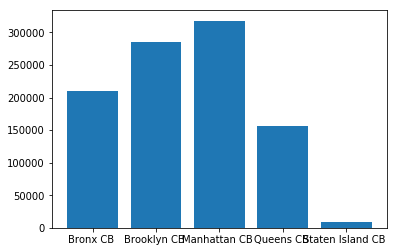

In [78]:
plt.bar(df3_n.Borough.unique(),pop_density)
plt.show()

<BarContainer object of 5 artists>

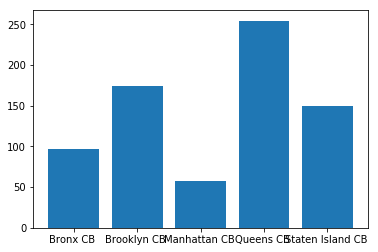

In [79]:
plt.bar(df3_n.Borough.unique(),area_n)

# Observations

It is clear from the above plot that Manhattan is densely populated and Queens is the largest Borough of New York City

# Longitude and Latitude with the help of geopy

In [80]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [81]:
manhat=df3_n[df3_n.Borough.str.contains("Manhattan")]
manhat.head()

,Borough,Area/Km,Population,Population/km,Neighborhood
30,Manhattan CB,4.45,34420.0,7735.0,"Battery Park City, Financial District, TriBeCa"
31,Manhattan CB,4.01,93119.0,23222.0,"Chinatown, Greenwich Village, Little Italy, Lo..."
32,Manhattan CB,4.56,164407.0,36054.0,"Alphabet City, Chinatown, East Village, Lower ..."
33,Manhattan CB,5.41,87479.0,16170.0,"Chelsea, Clinton"
34,Manhattan CB,4.25,44028.0,10360.0,Midtown


# Four square API

In [82]:
with open('nyu-2451-34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']

In [83]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [84]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [85]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [86]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [87]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [88]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [89]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [90]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [91]:
queen_data=neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queen_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [92]:
address_m = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location_m = geolocator.geocode(address_m)
latitude_m = location_m.latitude
longitude_m = location_m.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7127281, -74.0060152.


In [93]:
address_q = 'Queens, NY'

geolocator_q = Nominatim(user_agent="ny_explorer")
location_q = geolocator.geocode(address_q)
latitude_q = location_q.latitude
longitude_q = location_q.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude_q, longitude_q))

The geograpical coordinate of Queens are 40.6524927, -73.7914214158161.


In [94]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude_m, longitude_m], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [95]:
# create map of Manhattan using latitude and longitude values
map_queen = folium.Map(location=[latitude_q, longitude_q], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queen_data['Latitude'], queen_data['Longitude'], queen_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queen)  
    
map_queen

In [97]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'])

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [98]:

queen_venues = getNearbyVenues(names=queen_data['Neighborhood'],
                                   latitudes=queen_data['Latitude'],
                                   longitudes=queen_data['Longitude']
                                  )


Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [99]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [100]:
queen_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
4,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym


In [101]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,99,99,99,99,99,99
Carnegie Hill,100,100,100,100,100,100
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
East Village,100,100,100,100,100,100


In [102]:
queen_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,18,18,18,18,18,18
Astoria,100,100,100,100,100,100
Astoria Heights,11,11,11,11,11,11
Auburndale,17,17,17,17,17,17
Bay Terrace,40,40,40,40,40,40
Bayside,74,74,74,74,74,74
Bayswater,3,3,3,3,3,3
Beechhurst,16,16,16,16,16,16
Bellaire,11,11,11,11,11,11


# Visualising Manhattan Venue Counts

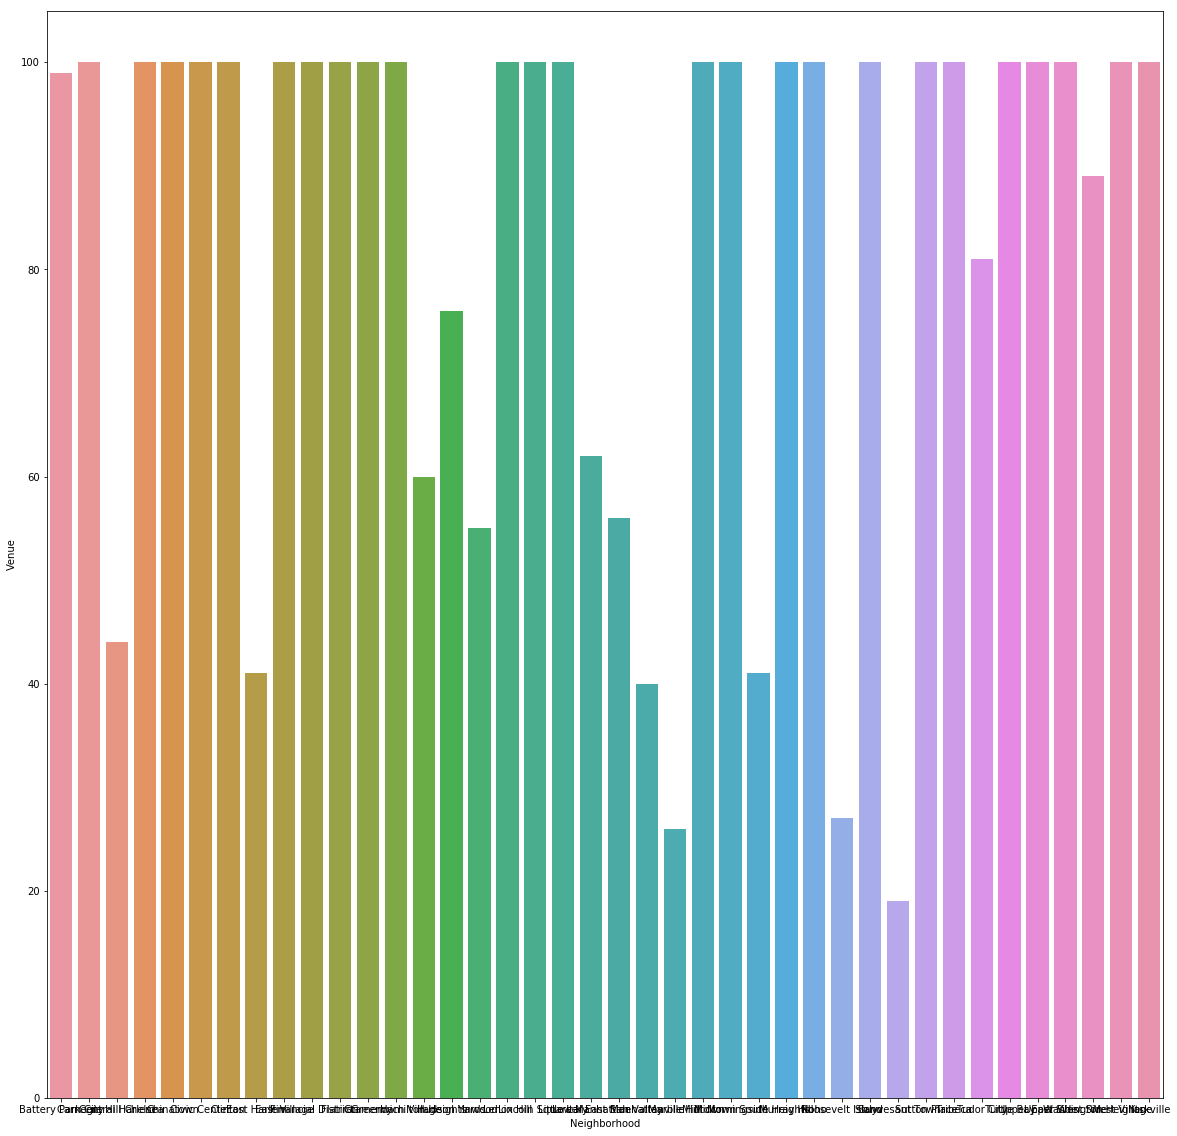

In [103]:
fig=plt.figure(figsize=(20,20))
sns.barplot(manhattan_venues.groupby('Neighborhood').count().index,manhattan_venues.groupby('Neighborhood').count()["Venue"])

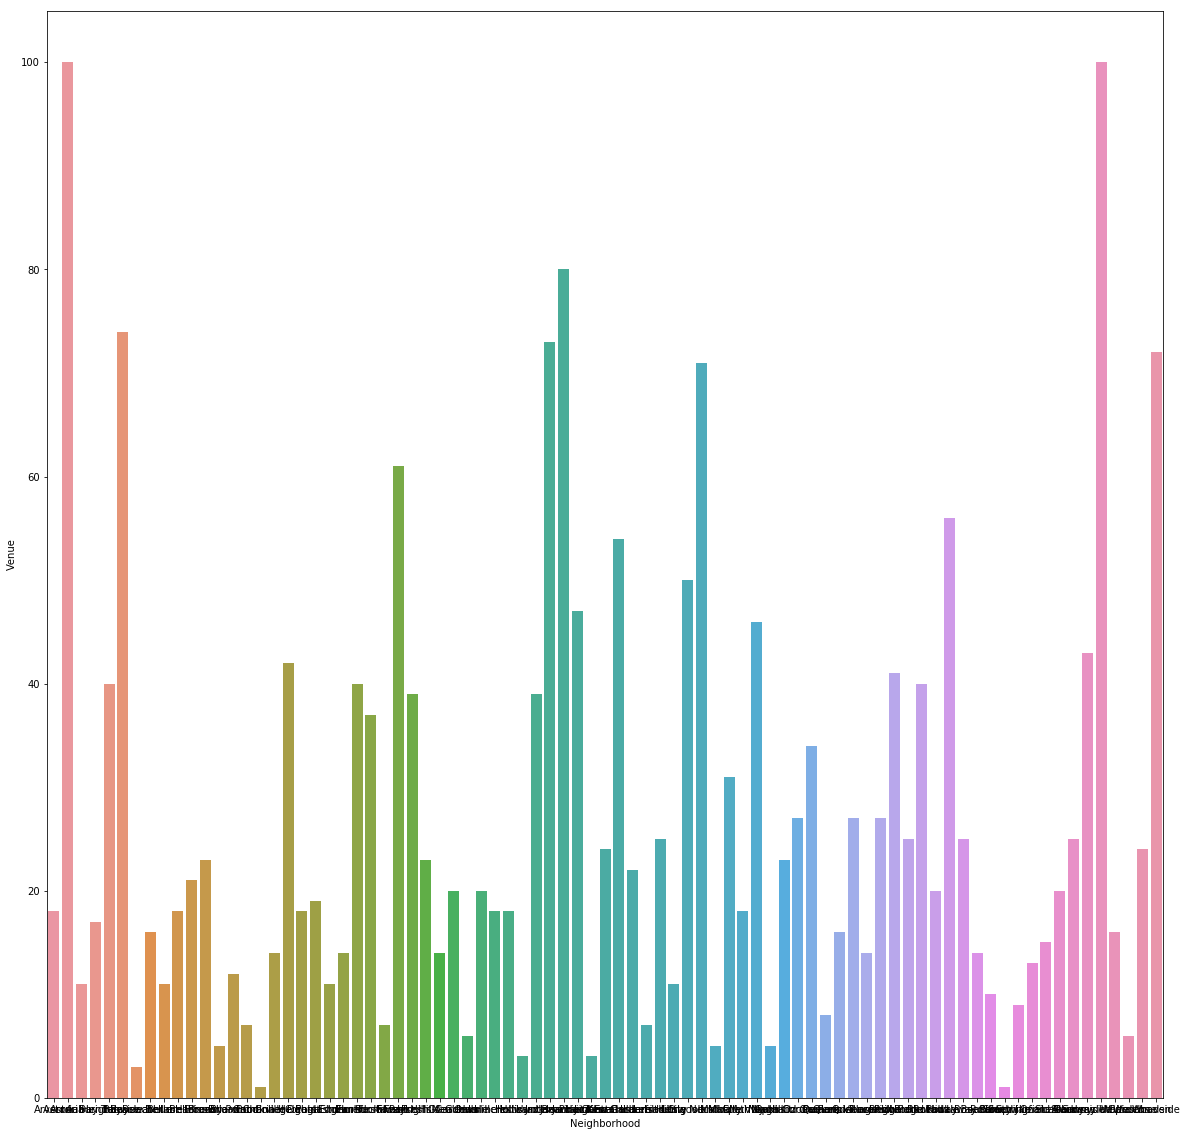

In [104]:
fig=plt.figure(figsize=(20,20))
sns.barplot(queen_venues.groupby('Neighborhood').count().index,queen_venues.groupby('Neighborhood').count()["Venue"])

In [105]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 337 uniques categories.


In [106]:
print('There are {} uniques categories.'.format(len(queen_venues['Venue Category'].unique())))

There are 274 uniques categories.


In [107]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store

In [108]:
# one hot encoding
queen_onehot = pd.get_dummies(queen_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
queen_onehot['Neighborhood'] = queen_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns_q = [queen_onehot.columns[-1]] + list(queen_onehot.columns[:-1])
queen_onehot = queen_onehot[fixed_columns_q]

queen_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Jo

In [109]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store

In [110]:
queen_grouped = queen_onehot.groupby('Neighborhood').mean().reset_index()
queen_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Jo

In [111]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0    Coffee Shop  0.07
1           Park  0.07
2          Hotel  0.05
3            Gym  0.04
4  Memorial Site  0.04


----Carnegie Hill----
                venue  freq
0         Pizza Place  0.06
1         Coffee Shop  0.06
2                Café  0.04
3  Italian Restaurant  0.03
4              Bakery  0.03


----Central Harlem----
                 venue  freq
0   Chinese Restaurant  0.07
1   African Restaurant  0.07
2                  Bar  0.05
3  American Restaurant  0.05
4    French Restaurant  0.05


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1      Ice Cream Shop  0.05
2  Italian Restaurant  0.05
3              Bakery  0.04
4           Nightclub  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1           Cocktail Bar  0.05
2     Salon / Barbershop  0.04
3    American Restaurant  0.04
4  Vietnamese Restaurant  0.04


----Civic Center----
                  venue  freq


In [112]:
num_top_venues = 5

for hood in queen_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = queen_grouped[queen_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
             venue  freq
0        Surf Spot  0.22
1    Metro Station  0.11
2   Sandwich Place  0.11
3  Thai Restaurant  0.06
4      Pizza Place  0.06


----Astoria----
                       venue  freq
0  Middle Eastern Restaurant  0.07
1                        Bar  0.06
2                 Hookah Bar  0.05
3           Greek Restaurant  0.05
4         Seafood Restaurant  0.04


----Astoria Heights----
                venue  freq
0  Italian Restaurant  0.09
1         Pizza Place  0.09
2         Bus Station  0.09
3         Supermarket  0.09
4       Bowling Alley  0.09


----Auburndale----
                venue  freq
0  Italian Restaurant  0.06
1            Pharmacy  0.06
2   Mobile Phone Shop  0.06
3  Miscellaneous Shop  0.06
4        Noodle House  0.06


----Bay Terrace----
                 venue  freq
0       Clothing Store  0.12
1        Women's Store  0.05
2           Donut Shop  0.05
3           Kids Store  0.05
4  American Restaurant  0.05


----Bayside----
         

         venue  freq
0  Bus Station  0.14
1         Bank  0.14
2  Pizza Place  0.09
3   Playground  0.09
4   Smoke Shop  0.05


----Laurelton----
                  venue  freq
0  Caribbean Restaurant  0.43
1        Cosmetics Shop  0.29
2         Train Station  0.14
3                  Park  0.14
4           Yoga Studio  0.00


----Lefrak City----
                venue  freq
0      Cosmetics Shop  0.08
1    Department Store  0.08
2              Bakery  0.08
3          Steakhouse  0.04
4  Mexican Restaurant  0.04


----Lindenwood----
                     venue  freq
0            Deli / Bodega  0.09
1               Donut Shop  0.09
2       Chinese Restaurant  0.09
3  Fruit & Vegetable Store  0.09
4                      Gym  0.09


----Little Neck----
                 venue  freq
0   Chinese Restaurant  0.08
1        Deli / Bodega  0.06
2   Italian Restaurant  0.06
3  Japanese Restaurant  0.04
4                 Bank  0.04


----Long Island City----
                venue  freq
0             

In [113]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [169]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_m = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_m['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted_m.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_m.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Boat or Ferry,Italian Restaurant,Wine Shop,Sushi Restaurant,Sandwich Place
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,Spa,Bakery,Bar,Bookstore,Cosmetics Shop,French Restaurant
2,Central Harlem,African Restaurant,Chinese Restaurant,Public Art,American Restaurant,French Restaurant,Bar,Seafood Restaurant,Bookstore,Library,Gym / Fitness Center
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Hotel,American Restaurant,Seafood Restaurant,Theater,Art Gallery
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Salon / Barbershop,Vietnamese Restaurant,Spa,Bubble Tea Shop,Bakery,Dumpling Restaurant,Asian Restaurant


In [170]:
# create a new dataframe
neighborhoods_venues_sorted_q = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_q['Neighborhood'] = queen_grouped['Neighborhood']

for ind in np.arange(queen_grouped.shape[0]):
    neighborhoods_venues_sorted_q.iloc[ind, 1:] = return_most_common_venues(queen_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_q.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Metro Station,Sandwich Place,Thai Restaurant,Pizza Place,Donut Shop,Coffee Shop,Bus Stop,Board Shop,Bed & Breakfast
1,Astoria,Middle Eastern Restaurant,Bar,Hookah Bar,Greek Restaurant,Seafood Restaurant,Bakery,Pizza Place,Salon / Barbershop,Pub,Mediterranean Restaurant
2,Astoria Heights,Plaza,Italian Restaurant,Bus Station,Bowling Alley,Supermarket,Liquor Store,Bakery,Burger Joint,Playground,Hostel
3,Auburndale,Athletics & Sports,Pet Store,Korean Restaurant,Gymnastics Gym,Furniture / Home Store,Toy / Game Store,Discount Store,Noodle House,Train,Italian Restaurant
4,Bay Terrace,Clothing Store,Women's Store,American Restaurant,Donut Shop,Lingerie Store,Cosmetics Shop,Mobile Phone Shop,Kids Store,Deli / Bodega,Movie Theater


In [171]:
# set number of clusters
kclusters_m = 3

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_m = KMeans(n_clusters=kclusters_m, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_m.labels_[0:10] 

array([1, 2, 1, 2, 1, 2, 2, 1, 1, 2])

In [172]:
# set number of clusters
kclusters_q = 3

queen_grouped_clustering = queen_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_q = KMeans(n_clusters=kclusters_q, random_state=0).fit(queen_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_q.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [173]:
# add clustering labels
neighborhoods_venues_sorted_m.insert(0, 'Cluster Labels', kmeans_m.labels_)
neighborhoods_venues_sorted_m.head()
manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted_m.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Coffee Shop,Discount Store,Yoga Studio,Supplement Shop,Steakhouse,Spa,Shopping Mall,Seafood Restaurant,Clothing Store
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Salon / Barbershop,Vietnamese Restaurant,Spa,Bubble Tea Shop,Bakery,Dumpling Restaurant,Asian Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Café,Mexican Restaurant,Bakery,Mobile Phone Shop,Grocery Store,Coffee Shop,Tapas Restaurant,New American Restaurant,Liquor Store,Latin American Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,1,Mexican Restaurant,Café,Lounge,Pizza Place,Restaurant,Bakery,Spanish Restaurant,Park,Frozen Yogurt Shop,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Mexican Restaurant,Café,Pizza Place,Coffee Shop,Yoga Studio,Liquor Store,Indian Restaurant,Park,Sushi Restaurant,Sandwich Place


In [174]:
# add clustering labels
neighborhoods_venues_sorted_q.insert(0, 'Cluster Labels', kmeans_q.labels_)

queen_merged = queen_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
queen_merged = queen_merged.join(neighborhoods_venues_sorted_q.set_index('Neighborhood'), on='Neighborhood')

queen_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,0,Middle Eastern Restaurant,Bar,Hookah Bar,Greek Restaurant,Seafood Restaurant,Bakery,Pizza Place,Salon / Barbershop,Pub,Mediterranean Restaurant
1,Queens,Woodside,40.746349,-73.901842,0,Grocery Store,Thai Restaurant,Filipino Restaurant,Latin American Restaurant,Bakery,Pizza Place,American Restaurant,Donut Shop,Bar,Pub
2,Queens,Jackson Heights,40.751981,-73.882821,0,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mexican Restaurant,Diner,Mobile Phone Shop,Spanish Restaurant,Thai Restaurant,Supermarket
3,Queens,Elmhurst,40.744049,-73.881656,0,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,South American Restaurant,Bubble Tea Shop,Colombian Restaurant,Sushi Restaurant,Salon / Barbershop
4,Queens,Howard Beach,40.654225,-73.838138,0,Bagel Shop,Italian Restaurant,Pharmacy,Fast Food Restaurant,Sandwich Place,Deli / Bodega,Market,Doctor's Office,Sushi Restaurant,Supermarket


In [175]:
# create map
map_clusters_m = folium.Map(location=[latitude_m, longitude_m], zoom_start=11)

# set color scheme for the clusters
x_m = np.arange(kclusters_m)
ys_m = [i + x_m + (i*x_m)**2 for i in range(kclusters_m)]
colors_array_m = cm.rainbow(np.linspace(0, 1, len(ys_m)))
rainbow_m = [colors.rgb2hex(i) for i in colors_array_m]

# add markers to the map
markers_colors_m = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow_m[(cluster-1)],
        fill=True,
        fill_color=rainbow_m[(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters_m)
       
map_clusters_m

In [176]:
# create map
map_clusters_q = folium.Map(location=[latitude_q, longitude_q], zoom_start=11)

# set color scheme for the clusters
x_q = np.arange(kclusters_q)
ys_q = [i + x_q + (i*x_q)**2 for i in range(kclusters_q)]
colors_array_q = cm.rainbow(np.linspace(0, 1, len(ys_q)))
rainbow_q = [colors.rgb2hex(i) for i in colors_array_q]

# add markers to the map
markers_colors_q = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow_q[cluster-1],
        fill=True,
        fill_color=rainbow_q[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_q)
       
map_clusters_q

# Analysis of Cluster of Manhattan

# Cluster 1 Bar

In [180]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Playground,Boat or Ferry,Park,Pet Service,Coffee Shop,Basketball Court,Gas Station,Baseball Field,Fountain


# Cluster 2 Mexican Restaurant

In [183]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Coffee Shop,Discount Store,Yoga Studio,Supplement Shop,Steakhouse,Spa,Shopping Mall,Seafood Restaurant,Clothing Store
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Salon / Barbershop,Vietnamese Restaurant,Spa,Bubble Tea Shop,Bakery,Dumpling Restaurant,Asian Restaurant
2,Washington Heights,Café,Mexican Restaurant,Bakery,Mobile Phone Shop,Grocery Store,Coffee Shop,Tapas Restaurant,New American Restaurant,Liquor Store,Latin American Restaurant
3,Inwood,Mexican Restaurant,Café,Lounge,Pizza Place,Restaurant,Bakery,Spanish Restaurant,Park,Frozen Yogurt Shop,Chinese Restaurant
4,Hamilton Heights,Mexican Restaurant,Café,Pizza Place,Coffee Shop,Yoga Studio,Liquor Store,Indian Restaurant,Park,Sushi Restaurant,Sandwich Place
5,Manhattanville,Italian Restaurant,Park,Mexican Restaurant,Seafood Restaurant,Coffee Shop,Chinese Restaurant,Cuban Restaurant,Dumpling Restaurant,Bike Trail,Sushi Restaurant
6,Central Harlem,African Restaurant,Chinese Restaurant,Public Art,American Restaurant,French Restaurant,Bar,Seafood Restaurant,Bookstore,Library,Gym / Fitness Center
7,East Harlem,Mexican Restaurant,Bakery,Deli / Bodega,Thai Restaurant,Latin American Restaurant,Spa,Café,French Restaurant,Steakhouse,Spanish Restaurant
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Sushi Restaurant,Japanese Restaurant,Mexican Restaurant,Deli / Bodega,Wine Shop
11,Roosevelt Island,Sandwich Place,Coffee Shop,Park,Gym,Bus Stop,Farmers Market,Supermarket,Liquor Store,Greek Restaurant,Scenic Lookout


# Cluster 3 Italian Restaurant

In [187]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Exhibit,Art Gallery,Bakery,Gym / Fitness Center,Juice Bar,Coffee Shop,French Restaurant,Hotel,Spa
10,Lenox Hill,Coffee Shop,Italian Restaurant,Sushi Restaurant,Pizza Place,Cosmetics Shop,Burger Joint,Gym,Gym / Fitness Center,Sporting Goods Shop,Gift Shop
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Cosmetics Shop,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Indian Restaurant,Coffee Shop,Bakery,Café
13,Lincoln Square,Gym / Fitness Center,Theater,Café,Concert Hall,Plaza,Italian Restaurant,French Restaurant,Opera House,Park,Performing Arts Venue
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,American Restaurant,Hotel,Spa,Sandwich Place,Coffee Shop,Wine Shop,Wine Bar
15,Midtown,Hotel,Coffee Shop,Cocktail Bar,Clothing Store,Theater,Steakhouse,Food Truck,Sporting Goods Shop,Japanese Restaurant,Spa
16,Murray Hill,Hotel,Coffee Shop,Sandwich Place,Japanese Restaurant,Italian Restaurant,Gym / Fitness Center,French Restaurant,Gym,Sushi Restaurant,Bakery
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Hotel,American Restaurant,Seafood Restaurant,Theater,Art Gallery
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,French Restaurant,Café,Cosmetics Shop,Chinese Restaurant,Cocktail Bar
21,Tribeca,Italian Restaurant,Spa,Park,Boutique,Café,American Restaurant,Wine Shop,Wine Bar,Gym,Greek Restaurant


# Analysis of Queens Clusters

# Cluster 1 Deli

In [194]:
queen_merged.loc[queen_merged['Cluster Labels'] == 0, queen_merged.columns[[1] + list(range(5, queen_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Middle Eastern Restaurant,Bar,Hookah Bar,Greek Restaurant,Seafood Restaurant,Bakery,Pizza Place,Salon / Barbershop,Pub,Mediterranean Restaurant
1,Woodside,Grocery Store,Thai Restaurant,Filipino Restaurant,Latin American Restaurant,Bakery,Pizza Place,American Restaurant,Donut Shop,Bar,Pub
2,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mexican Restaurant,Diner,Mobile Phone Shop,Spanish Restaurant,Thai Restaurant,Supermarket
3,Elmhurst,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,South American Restaurant,Bubble Tea Shop,Colombian Restaurant,Sushi Restaurant,Salon / Barbershop
4,Howard Beach,Bagel Shop,Italian Restaurant,Pharmacy,Fast Food Restaurant,Sandwich Place,Deli / Bodega,Market,Doctor's Office,Sushi Restaurant,Supermarket
5,Corona,Mexican Restaurant,Convenience Store,Park,Playground,Bus Station,Supermarket,Empanada Restaurant,Chinese Restaurant,Sandwich Place,Donut Shop
6,Forest Hills,Gym / Fitness Center,Gym,Yoga Studio,Pizza Place,Convenience Store,Park,Thai Restaurant,Pharmacy,Video Game Store,Supplement Shop
7,Kew Gardens,Chinese Restaurant,Pharmacy,Donut Shop,Bank,Bar,Indian Restaurant,Deli / Bodega,Pet Store,Park,Pizza Place
8,Richmond Hill,Bank,Pizza Place,Discount Store,Caribbean Restaurant,Lounge,Latin American Restaurant,Cosmetics Shop,Pet Service,Diner,Park
9,Flushing,Chinese Restaurant,Korean Restaurant,Hotpot Restaurant,Bubble Tea Shop,Bakery,Gym,Sushi Restaurant,Karaoke Bar,Asian Restaurant,Gym / Fitness Center


# Cluster 2 Park and Tennis Court

In [195]:
queen_merged.loc[queen_merged['Cluster Labels'] == 1, queen_merged.columns[[1] + list(range(5, queen_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Somerville,Park,Women's Store,Filipino Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Electronics Store
79,Bayswater,Tennis Court,Playground,Park,Fast Food Restaurant,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Women's Store


# Cluster 3 Deli

In [196]:
queen_merged.loc[queen_merged['Cluster Labels'] == 2, queen_merged.columns[[1] + list(range(5, queen_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,Brookville,Deli / Bodega,Women's Store,Fish & Chips Shop,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market
